# 1 Dependencies and Imports

## 1.1 Check for GPU availability

In [1]:
!nvidia-smi

Sun Mar 23 06:27:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1.2 Install dependencies

In [ ]:
!pip install -U ultralytics
!pip install wandb"ray[tune]"
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: huilun2000 (huilunang) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


## 1.3 Import libraries

In [ ]:
import matplotlib.pyplot as plt

from ray import tune
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 2 Load Dataset

In [ ]:
rf = Roboflow(api_key="xxx")
project = rf.workspace("csc3101bloobin").project("csc3101_bloobin_dataset")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CSC3101_Bloobin_Dataset-3 in yolov11:: 100%|██████████| 3414/3414 [00:00<00:00, 7537.55it/s]


# 3 Model Training

In [ ]:
model = YOLO("yolo11s-seg.pt")

space_search = {
    "lr0": tune.uniform(1e-5, 1e-1),
    "lrf": tune.uniform(0.01, 1.0),
    "momentum": tune.uniform(0.6, 0.98),
    "box": tune.uniform(0.02, 0.2),
    "cls": tune.uniform(0.2, 4.0),
    "hsv_h": tune.uniform(0.0, 0.1),
    # "translate": tune.uniform(0.0, 0.9)
  }

result_grid = model.tune(
    data="/content/CSC3101_Bloobin_Dataset-3/data.yaml",
    space=space_search,
    epochs=50,
    imgsz=640,
    device=0,
    cache=True,
    use_ray=True,
)

# 4 Review Performance

Tuning Report: [wandb](https://api.wandb.ai/links/huilunang/d4s4j32b)

In [8]:
result_grid

ResultGrid<[
  Result(
    metrics={'metrics/precision(B)': 0.72805, 'metrics/recall(B)': 0.59708, 'metrics/mAP50(B)': 0.70225, 'metrics/mAP50-95(B)': 0.5591, 'metrics/precision(M)': 0.65178, 'metrics/recall(M)': 0.51646, 'metrics/mAP50(M)': 0.60113, 'metrics/mAP50-95(M)': 0.46063, 'val/box_loss': 0.0133, 'val/seg_loss': 0.02986, 'val/cls_loss': 4.71896, 'val/dfl_loss': 1.23757, 'epoch': 50},
    path='/content/runs/detect/tune/_tune_2025-03-21_14-48-26/_tune_8be04_00000_0_box=0.0920,cls=2.2047,hsv_h=0.0071,lr0=0.0772,lrf=0.9902,momentum=0.7629_2025-03-21_14-48-27',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'metrics/precision(B)': 0.70978, 'metrics/recall(B)': 0.59339, 'metrics/mAP50(B)': 0.7383, 'metrics/mAP50-95(B)': 0.58954, 'metrics/precision(M)': 0.66519, 'metrics/recall(M)': 0.53371, 'metrics/mAP50(M)': 0.67715, 'metrics/mAP50-95(M)': 0.5154, 'val/box_loss': 0.0187, 'val/seg_loss': 0.0411, 'val/cls_loss': 2.8176, 'val/dfl_loss': 1.06426, 'epoch': 50}

Trial 0: metrics/precision(B)                                             0.72805
metrics/recall(B)                                                0.59708
metrics/mAP50(B)                                                 0.70225
metrics/mAP50-95(B)                                               0.5591
metrics/precision(M)                                             0.65178
metrics/recall(M)                                                0.51646
metrics/mAP50(M)                                                 0.60113
metrics/mAP50-95(M)                                              0.46063
val/box_loss                                                      0.0133
val/seg_loss                                                     0.02986
val/cls_loss                                                     4.71896
val/dfl_loss                                                     1.23757
epoch                                                                 50
timestamp                                 

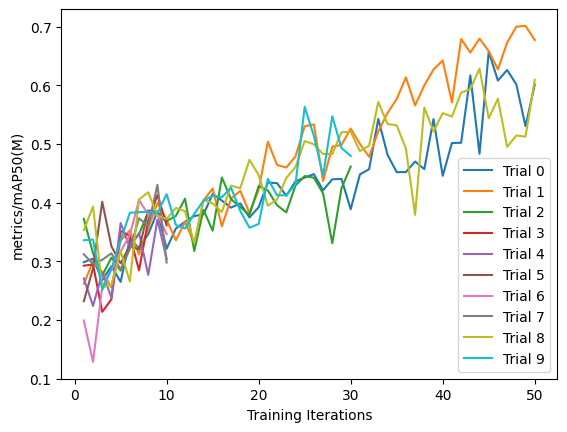

In [13]:
for i, result in enumerate(result_grid):
    print(f"Trial {i}: {result.metrics_dataframe.iloc[-1]}")
    plt.plot(
        result.metrics_dataframe["training_iteration"],
        result.metrics_dataframe["metrics/mAP50(M)"],
        label=f"Trial {i}",
    )

plt.xlabel("Training Iterations")
plt.ylabel("metrics/mAP50(M)")
plt.legend()
plt.show()

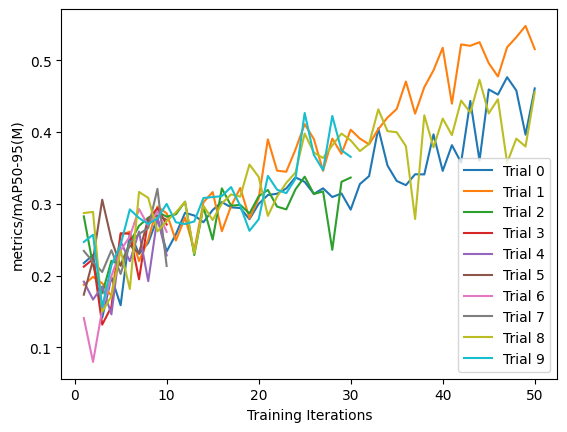

In [16]:
for i, result in enumerate(result_grid):
    plt.plot(
        result.metrics_dataframe["training_iteration"],
        result.metrics_dataframe["metrics/mAP50-95(M)"],
        label=f"Trial {i}",
    )

plt.xlabel("Training Iterations")
plt.ylabel("metrics/mAP50-95(M)")
plt.legend()
plt.show()

# 5 Export

In [ ]:
import shutil
from google.colab import files

train_result_folder_path = '/content/runs'

shutil.make_archive(train_result_folder_path, 'zip', train_result_folder_path)

files.download(f"{train_result_folder_path}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>